Houston Crimes

Category		Number of occurences
Theft                 554369
Burglary              182240
Auto Theft            100894
Aggravated Assault     82971
Robbery                76783
Rape                    7129
Murder                  1926
UNK                       14
Name: OffenseType, dtype: int64


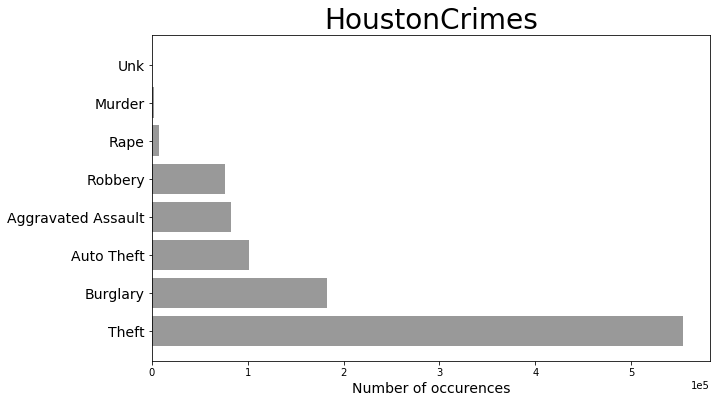

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab

pylab.rcParams['figure.figsize'] = (10.0, 6.0)
filename = 'crime_final_clean10_17.csv'
#filename = '../input/train.csv'
data = pd.read_csv(filename, parse_dates=['Date'], index_col='Date')
crimes_rating = data['OffenseType'].value_counts()
y_pos = np.arange(len(crimes_rating[0:18].keys()))

plt.barh(y_pos, crimes_rating[0:18].get_values(),  align='center', alpha=0.4, color = 'black')

plt.yticks(y_pos, map(lambda x:x.title(),crimes_rating[0:18].keys()), fontsize = 14)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('HoustonCrimes', fontsize = 28)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print ('Houston Crimes\n')
print ('Category\t\tNumber of occurences') 
print (crimes_rating)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           65536 non-null float64
day            1006326 non-null int64
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 92.1+ MB


In [7]:
data =  data.loc['2010':'2017']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003745 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1003745 non-null object
BlockRange     1003589 non-null object
StreetName     1003719 non-null object
OffenseType    1003745 non-null object
Premise        1003745 non-null object
NumOffenses    1003745 non-null float64
Hour           65454 non-null float64
day            1003745 non-null int64
weekday        1003745 non-null object
month          1003745 non-null object
year           1003745 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 91.9+ MB


## hour

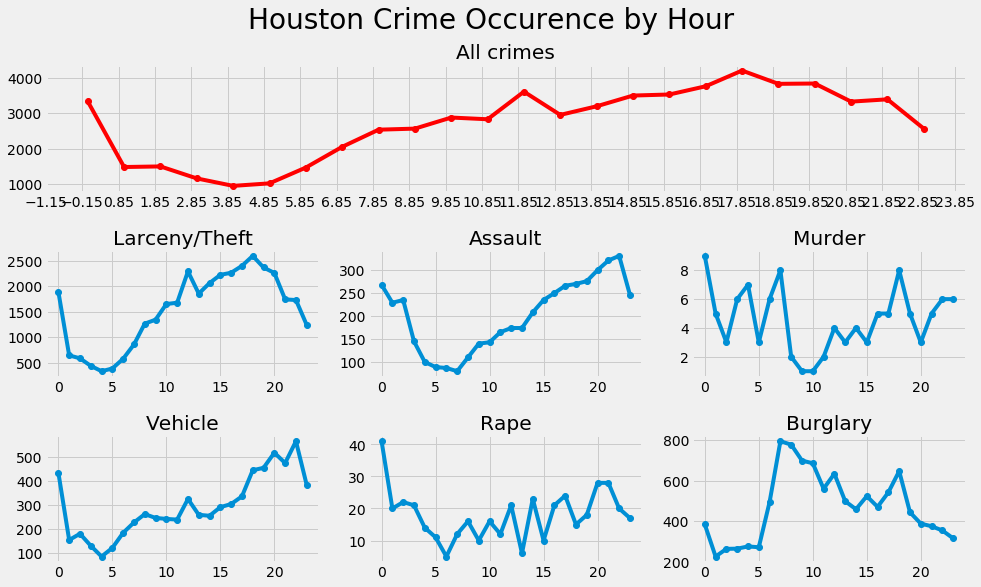

In [10]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = data[data['OffenseType'] == "Theft"]
assault = data[data['OffenseType'] == "Aggravated Assault"]
murder = data[data['OffenseType'] == "Murder"]
vehicle = data[data['OffenseType'] == "Auto Theft"]
rape = data[data['OffenseType'] == "Rape"]
burglary = data[data['OffenseType'] == "Burglary"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(data.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(murder.groupby('Hour').size(), 'o-')
    ax4.set_title ('Murder')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(rape.groupby('Hour').size(), 'o-')
    ax6.set_title ('Rape')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(0.5, 1.03, 
                    'Houston Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()

# crimes by day of week

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003745 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1003745 non-null object
BlockRange     1003589 non-null object
StreetName     1003719 non-null object
OffenseType    1003745 non-null object
Premise        1003745 non-null object
NumOffenses    1003745 non-null float64
Hour           65454 non-null float64
day            1003745 non-null int64
weekday        1003745 non-null object
month          1003745 non-null object
year           1003745 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 111.9+ MB


In [14]:
data.groupby('weekday').size().keys()

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='weekday')

In [15]:
data.groupby('weekday').size().get_values()

array([154094, 147879, 142261, 128321, 144309, 142979, 143902])

In [18]:
murder.groupby('weekday').size().get_values()

array([273, 238, 317, 362, 249, 238, 226])

TypeError: must be str, not float

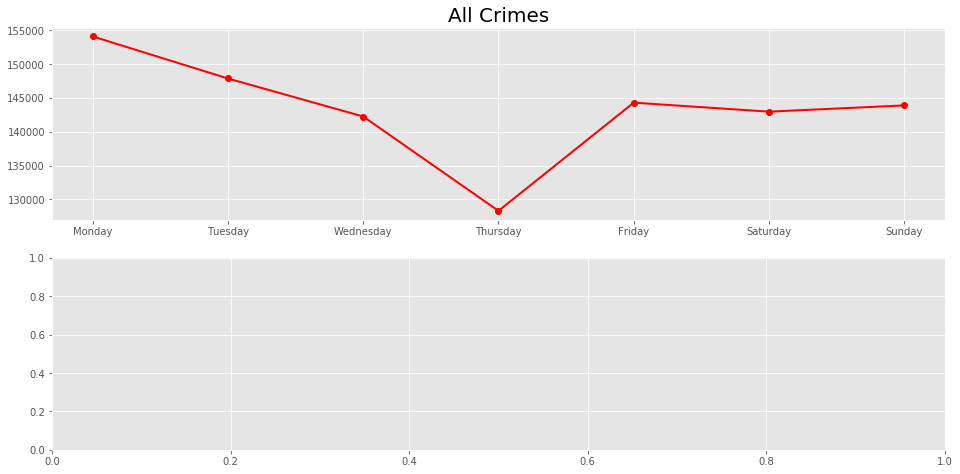

In [11]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

daysOfWeekIdx = data.groupby('weekday').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = data.groupby('weekday').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(daysOfWeekIdx, occursByWeek, 'ro-', linewidth=2)
ax1.set_xticklabels(daysOfWeekLit)
ax1.set_title ('All Crimes', fontsize=20)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Bar plot
y = np.empty([6,7])
h = [None]*6
width = 0.1

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)

y[0] = larceny.groupby('weekday').size().get_values()
y[1] = assault.groupby('weekday').size().get_values()
y[2] = murder.groupby('weekday').size().get_values()
y[3] = vehicle.groupby('weekday').size().get_values()
y[4] = rape.groupby('weekday').size().get_values()
y[5] = burglary.groupby('weekday').size().get_values()

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,6):
    h[i] = ax2.bar(daysOfWeekIdx + i*width, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(daysOfWeekIdx + 3*width)
ax2.set_xticklabels(daysOfWeekLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Larceny', 'Assault', 'Murder', 'Vehicle', 'Rape', 'Burglary'), 
           bbox_to_anchor=(0.88, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'Houston Crime Occurence by Day Of Week',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)

plt.show()

In [19]:
## month

In [22]:
data.groupby('month').size().keys()

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='month')

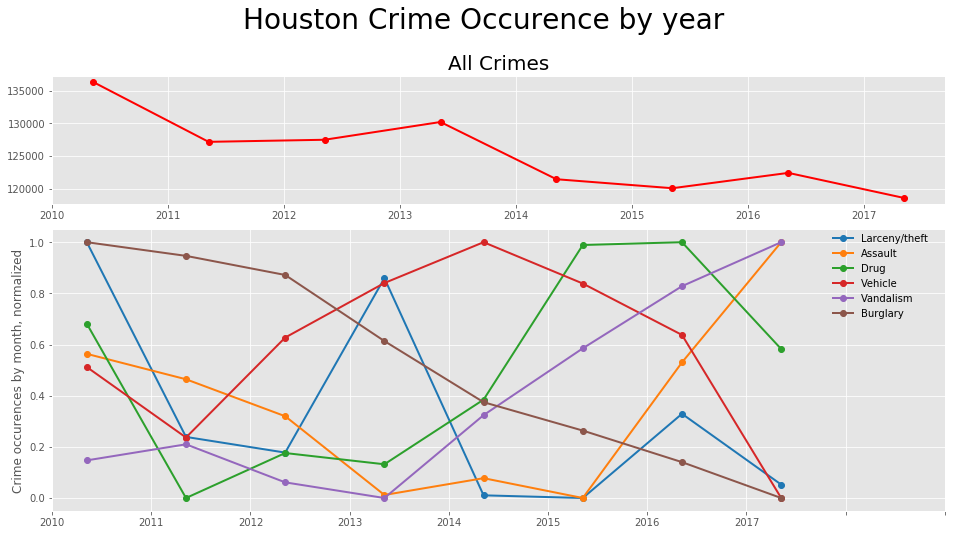

In [60]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = data.groupby('year').size().keys()
monthsLit = ['2010', '2011', 
             '2012', '2013', '2014', 
             '2015', '2016','2017']


occursByMonth = data.groupby('year').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
ax1.set_xticklabels(monthsLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([7,8])
y[0] = larceny.groupby('year').size().get_values()
y[1] = assault.groupby('year').size().get_values()
y[2] = murder.groupby('year').size().get_values()
y[3] = vehicle.groupby('year').size().get_values()
y[4] = rape.groupby('year').size().get_values()
y[5] = burglary.groupby('year').size().get_values()

crimes = ['Larceny/theft', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,6):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'Houston Crime Occurence by year',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

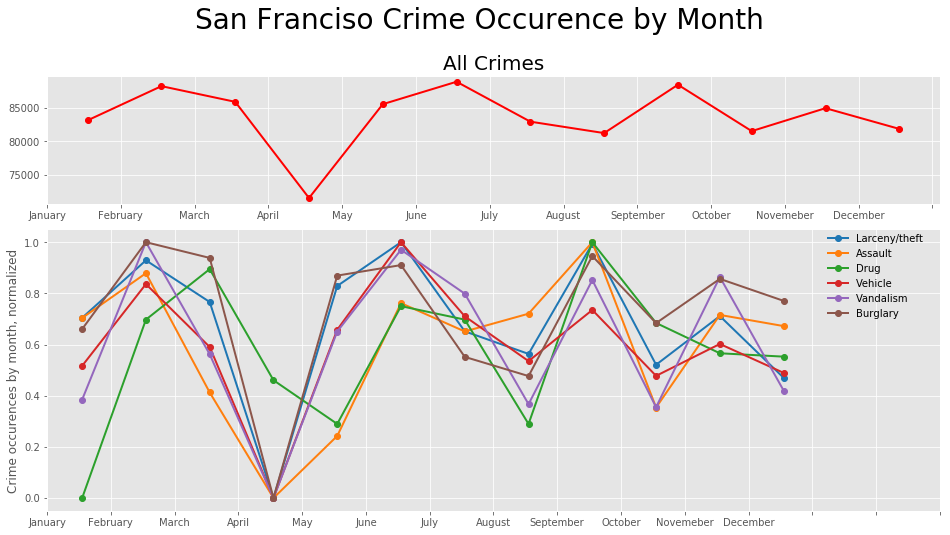

In [37]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = data.groupby('month').size().keys()
monthsLit = ['January', 'February', 
             'March', 'April', 'May', 
             'June', 'July','August', 
             'September', 'October', 'Novemeber', 'December']
occursByMonth = data.groupby('month').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
ax1.set_xticklabels(monthsLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,12])
y[0] = larceny.groupby('month').size().get_values()
y[1] = assault.groupby('month').size().get_values()
y[2] = murder.groupby('month').size().get_values()
y[3] = vehicle.groupby('month').size().get_values()
y[4] = rape.groupby('month').size().get_values()
y[5] = burglary.groupby('month').size().get_values()

crimes = ['Larceny/theft', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,6):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Month',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

# crimes by year

In [25]:
larceny.groupby('year').size().get_values()

array([74571, 68323, 67820, 73417, 66449, 66363, 69065, 66794])

In [29]:
np.empty([6,13])

array([[6.95254710e-310, 6.95254710e-310, 6.95249925e-310,
        6.95249925e-310, 6.95250715e-310, 5.43472210e-323,
        0.00000000e+000, 3.95252517e-323, 6.95229481e-310,
        0.00000000e+000, 4.44659081e-323, 6.95250790e-310,
        6.95330124e-310],
       [0.00000000e+000, 0.00000000e+000,             nan,
        6.95250715e-310, 6.95250701e-310, 3.55727265e-322,
        3.45845952e-323, 6.95250790e-310, 6.95330124e-310,
        0.00000000e+000, 4.94065646e-324, 4.94065646e-324,
        6.95250715e-310],
       [6.95250701e-310, 7.11454530e-322, 1.48219694e-323,
        6.95250790e-310, 6.95330124e-310, 0.00000000e+000,
        4.94065646e-324, 4.94065646e-324, 0.00000000e+000,
        0.00000000e+000, 1.06718180e-321, 4.44659081e-323,
        6.95250790e-310],
       [6.95330124e-310, 0.00000000e+000, 1.97626258e-323,
        4.94065646e-324, 0.00000000e+000, 0.00000000e+000,
        1.42290906e-321, 4.44659081e-323, 6.95250790e-310,
        6.95330124e-310, 3.95252517e-

In [31]:
data.groupby('year').size().keys()

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='year')

In [32]:
data.groupby('year').size().get_values()

array([136357, 127168, 127486, 130200, 121451, 120079, 122423, 118581])

ValueError: could not broadcast input array from shape (8) into shape (13)

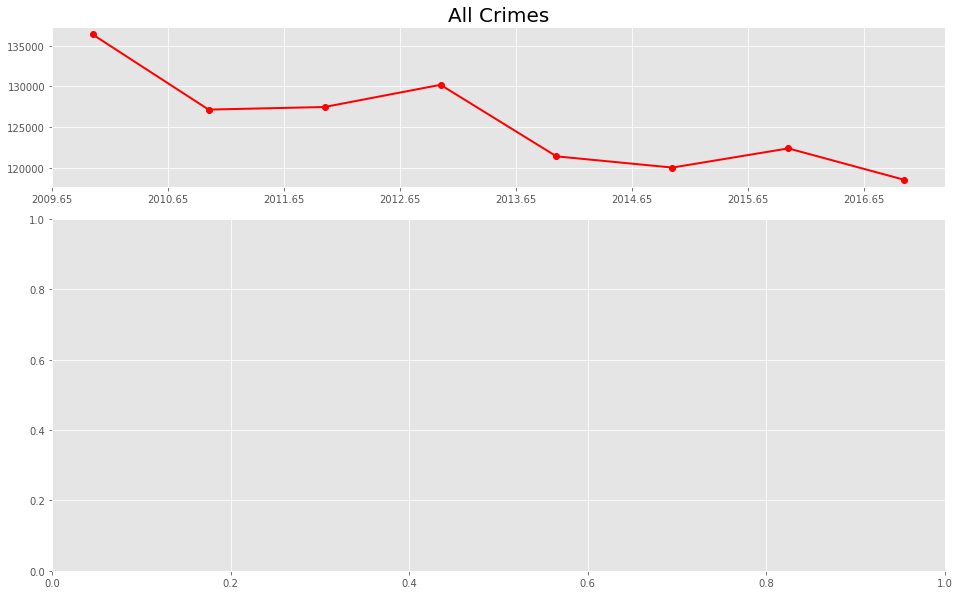

In [36]:
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

years = data.groupby('year').size().keys()
occursByYear = data.groupby('year').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(years, occursByYear, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,13])
y[0] = larceny.groupby('year').size().get_values()
y[1] = assault.groupby('year').size().get_values()
y[2] = murder.groupby('year').size().get_values()
y[3] = vehicle.groupby('year').size().get_values()
y[4] = rape.groupby('year').size().get_values()
y[5] = burglary.groupby('year').size().get_values()

for i in range(0,6):
    h[i] = ax2.plot(years, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by year")

start, end = ax2.get_xlim()  
ax2.xaxis.set_ticks(np.arange(start, end+2, 1))

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'Houston Crime Occurence by Year',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

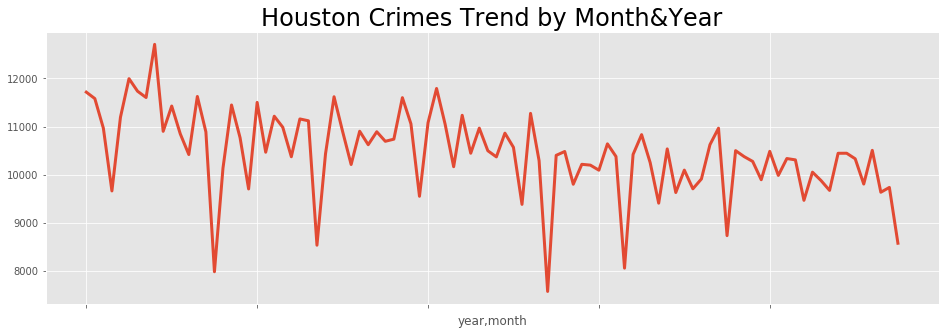

In [77]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = data.groupby(['year','month']).size()
ax = yearMonth.plot(lw=3)
#ax.set_xticklabels(data.groupby(['year','month']).size().keys())

plt.title('Houston Crimes Trend by Month&Year', fontsize=24)
plt.show()

In [70]:
data.groupby('month').size().keys()

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='month')